# Theorical introduction

## Variationnal Auto Encoder


This project is about impleting Huber-energy Variational Autoencoder with Tensorflow v2 (with Eager mode).
\
A Variational AutoEncoder (VAE) is a neural network architecture used as generative models. A VAE has two components : an encoder $E_{\theta_e}$ and a decoder $D_{\theta_d}$ where $\theta_e$ (resp. $\theta_d$) are the parameter of the encoder (resp. decoder) neural network. Suppose that we want to generate data from a distribution $\mathbb{P}^{real}$ on $\mathbb{R}^d$ and that we have an iid sample $(X_i)_{i=1}^n$ distributed according to $\mathbb{P}^{real}$. Let us take some distribution $\mu$ on the latent space $\mathbb{R}^k$ with $k<<d$ such that we are able to generate according to $\mu$. We will have two goals :

- With an input $X \sim \mathbb{P}^{real}$, we want $D_{\theta_d}(E_{\theta_e}(X)) \approx X$, so that the VAE is able to reconstruct $X$ after being encoded in a lower dimension.
- We want $E_{\theta_e}(X)$ to follow the distribution $\mu$, $ie$ $(E_{\theta_e})_\#\mathbb{P}^{real} \approx \mu$.

If these two goals are achivied, by generating some $Z \sim \mu$, then we have $D_{\theta_d}(Z) \sim \mathbb{P}^{real}$. We are then able to generate according to $\mathbb{P}^{real}$.
\
Let us now focus precisely on the two goals we have to achieve. The first one is that we want $D_{\theta_d}(E_{\theta_e}(X)) \approx X$. In order to train our neural network, the loss function will thus have a *reconstruction term* $L_{rec}$ defined as
$$
L_{rec}(\theta_e,\theta_d) := \mathbb{E}\bigg[\big(X-D_{\theta_d}(E_{\theta_e}(X))\big)^2\bigg].
$$
The second goal is making $E_{\theta_e}(X)$ follow the distribution $\mu$. By taking some distance $d$ between distributions on $\mathbb{R}^k$, we will a *latent term* $L_{lat}$ in the loss defined as
$$
L_{lat}(\theta_e) := d\big(\mu, \mathcal{L}(E_{\theta_e}(X))\big)^2
$$
where $\mathcal{L}(E_{\theta_e}(X))$ is the law of $E_{\theta_e}(X)$. With an iid sample $(X_i)_{i=1}^n$ distributed according to $\mathbb{P}^{real}$, we have the estimators
\begin{align*}
    &\hat{L}_{rec}(\theta_e,\theta_d) = \frac{1}{n}\sum_{i=1}^n \big(X_i - D_{\theta_d}(E_{\theta_e}(X_i))\big)^2,\\
    &\hat{L}_{lat}(\theta_e) = d\big(\mu, \frac{1}{n}\sum_{i=1}^n \delta_{E_{\theta_e}(X_i)}\big)^2.
\end{align*}
We can finally construct our loss for our VAE:
$$
\hat{L}_{tot}(\theta_e,\theta_d) = \hat{L}_{rec}(\theta_e,\theta_d) + \lambda \hat{L}_{lat}(\theta_e)
$$
where $\lambda > 0$ is a parameter used for giving a weight to each term of the loss.


## Huber energy distances

We now have to chose a distance beteween distributions for the latent term of the loss. We would like to have a distance such that the latent loss should be easy to minimize. By writing $\mathbb{P}_{\theta_e} := \mathcal{L}(E_{\theta_e}(X))$, we want
$$
\theta_e \longmapsto d\big(\mu, \mathbb{P}_{\theta_e} \big)^2
$$
to have convexity properties in order to minimize the loss. This distance should also be easily computable.
\
For exemple, if we have a geodesic $(\nu_t)_{t\in [0,1]}$ linking $\nu_0$ and $\nu_1$, we wish $t\mapsto d(\mu, \nu_t)^2 $ to have a single minimum. That is the case with the Radon-Sobolev (also called Huber-Energy) distances.
\
\
Definition:
\
Let $H$ be a Hilbert space included in the set of bounded continuous functions $\mathcal{C}_b(\mathbb{R}, \mathbb{R})$, so that its topological dual space $H'$ contains the set of probabilities on $\mathbb{R}$. Let $k\in \mathbb{N}$. Let $\mathcal{P}(\mathbb{R}^k)$ be the set of probability measures on $\mathbb{R}^k$. The Radon-Sobolev distance on $\mathcal{P}(\mathbb{R}^k)$ corresponding to $H$ is defined by
$$
d_{H}(\mu, \nu)^2 := \frac{1}{area(\mathbb{S}^{k-1})}\int_{\mathbb{S}^{k-1}} \| \theta_{\#}\mu - \theta_{\#}\nu \|_{H'} d\theta, \ \forall \mu, \nu \in \mathcal{P}(\mathbb{R}^k)
$$
where $\theta_{\#}\mu$ is the one-dimensional projection of $\mu$ on $Vect(\theta)$. $\theta_{\#}\mu$ is a probability measure on $\mathbb{R}$ and then an element of $H'$.
\
\
The convexity properties of this distance justifies its use for the latent loss of a VAE :
\
\
Proposition:
\
The distance $d_H$ has the following properties :

- Any line $\nu_t = (1-t)\nu_0 + t\nu_1$ is a geodesic for $d_H$ and $d_H$ is convex on $\nu_t$.
- For any $\mu \in \mathcal{P}(\mathbb{R}^k)$ and any geodesic $(\nu_t)_{t\in[0,1]}$, we have
$$
d_{H}(\mu, \nu_t)^2 = (1-t)d_{H}(\mu,\nu_0)^2 + t d_{H}(\mu,\nu_1)^2 - t(1-t)d_{H}(\nu_0, \nu_1)^2.
$$
- For $x_1,\ldots,x_n, \ y_1, \ldots, y_m \in \mathbb{R}^k$, we have
$$
d_{H}\big(\frac{1}{n}\sum_{i=1}^n \delta_{x_i}, \frac{1}{m}\sum_{j=1}^m \delta_{y_j}\big)^2 = \frac{1}{nm}\sum_{i=1}^n \sum_{j=1}^m d_{H}(\delta_{x_i}, \delta_{y_j})^2 - \frac{1}{2n^2} \sum_{i=1}^n \sum_{i'=1}^n d_{H}(\delta_{x_i}, \delta_{x_{i'}})^2  - \frac{1}{2m^2} \sum_{j=1}^m \sum_{j'=1}^m d_{H}(\delta_{y_j}, \delta_{y_{j'}})^2.
$$

## Huber-energy VAE

A Huber-energy VAE is thus a VAE where the later term of the loss function is calculated with the distance $d$ being the Radon-Sobolev distance.\
By taking $\mu$ as the standard normal distribution on $\mathbb{R}^k$ and $H$ being the Sobolev space $\dot{H}^1(\mathbb{R})$, we have the following approximation :
$$
d_{H}\big(\mathcal{N}(0,I_k), \frac{1}{n}\sum_{i=1}^n \delta_{z_i}\big)^2 = c_{N_0} + \frac{1}{n}\sum_{i=1}^n \sqrt{|z_i|^2 + c_{N_1}} - \frac{1}{2n^2}\sum_{i=1}^n \sum_{j=1}^n |z_i - z_j| + O(\sum_{i=1}^n|z_i|^4)
$$
where
\begin{align*}
&c_{N_0} = (\sqrt{2} - 1)\frac{\Gamma(\frac{k+1}{2})}{\Gamma(\frac{k}{2})} - \frac{\sqrt{2}\Gamma(1+\frac{k}{2})}{\Gamma(\frac{k+1}{2})},\\
&c_{N_1} = \frac{2\Gamma(1+\frac{k}{2})^2}{\Gamma(\frac{k+1}{2})^2}.
\end{align*}
The latent term of the loss function is thus easily computable with this explicit formula. \\
We are then able to compute the total loss term of our Huber-energy VAE. We have everything we need for its training.

# Modules and datasets

We only import very common libraries: Tensorflow, Keras, Numpy, Matplotlib and displaying tools in order to visualize the progression of the training loop.

In [ ]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, InputLayer, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose

# Random generator
import numpy as np

# Display of the results
import matplotlib.pyplot as plt

# Better display of the training
from IPython.display import clear_output
from tqdm import tqdm

We check here that we are using the Eager mode of Tensorflow v2. The following line should return a $\texttt{True}$ value

In [ ]:
print(tf.executing_eagerly())

True


Here one may enter the name of the studied dataset.

In [ ]:
dataset_name = 'MNIST' # 'MNIST' or 'CIFAR-10' or 'Fashion MNIST' or 'Boston housing'

We import classical datasets of different dimensions to test our VAE.

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()

cifar10 = tf.keras.datasets.cifar10
(train_images_cifar10, train_labels_cifar10), (test_images_cifar10, test_labels_cifar10) = cifar10.load_data()

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images_fashion_mnist, train_labels_fashion_mnist), (test_images_fashion_mnist, test_labels_fashion_mnist) = fashion_mnist.load_data()

boston_housing = tf.keras.datasets.boston_housing
(train_data_boston_housing, train_targets_boston_housing), (test_data_boston_housing, test_targets_boston_housing) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


# Parameters and architecture initialization

In this section, we fix once for all the parameters of the code for each dataset. \\
First, the training parameters: dataset, learning rate, epochs and batch size.

In [ ]:
mnist_training_parameters = {'dataset': train_images_mnist / 255.0,
                             'learning_rate': 0.0005,
                             'epochs': 2000,
                             'batch_size': 200}

cifar10_training_parameters = {'dataset': train_images_cifar10 / 255.0,
                               'learning_rate': 0.0005,
                               'epochs': 1000,
                               'batch_size': 200}

fashion_mnist_training_parameters = {'dataset': train_images_fashion_mnist / 255.0,
                                     'learning_rate': 0.0005,
                                     'epochs': 1000,
                                     'batch_size': 200}

boston_housing_training_parameters = {'dataset': train_data_boston_housing,
                                      'learning_rate': 0.00005,
                                      'epochs': 2000,
                                      'batch_size': 300}

Then, the parameters of each model: input dimension, either or not it contains 1D data, the dimension of the latent space, the encoder and the decoder.

In [ ]:
mnist_parameters = {'input_dim': (28,28,1),
                    '1D data': False,
                    'latent_dim': 12}

cifar10_parameters = {'input_dim': train_images_cifar10[0].shape,
                      '1D data': False,
                      'latent_dim': 70}

fashion_mnist_parameters = {'input_dim': (28,28,1),
                            '1D data': False,
                            'latent_dim': 12}

boston_housing_parameters = {'input_dim': (train_data_boston_housing[0].shape)[0],
                             '1D data': True,
                             'latent_dim': 3}

In [ ]:
# MNIST architecture

mnist_encoder = tf.keras.Sequential([
                InputLayer(input_shape = mnist_parameters['input_dim']),
                Conv2D(32, (3, 3), activation='relu'),
                Conv2D(64, (3, 3), activation='relu'),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(mnist_parameters['latent_dim'], activation=None)
            ])

mnist_decoder = tf.keras.Sequential([
                InputLayer(input_shape = mnist_parameters['latent_dim']),
                Dense(256, activation='relu'),
                Dense(1024, activation='relu'),
                Dense(8*8*8, activation='relu'),
                Reshape((8,8,8)),
                Conv2DTranspose(16, (8, 8), activation='relu'),
                Conv2DTranspose(4, (8, 8), activation='relu'),
                Conv2DTranspose(1, (7, 7), activation='sigmoid')
            ])

print(f"MNIST: input_shape {mnist_parameters['input_dim']} and decoder.output_shape {mnist_decoder.output_shape}")

#mnist_parameters['encoder'] = mnist_encoder
#mnist_parameters['decoder'] = mnist_decoder

# MNIST second architecture

number_of_neurons = 256

mnist_2_encoder = tf.keras.Sequential([
                InputLayer(input_shape = mnist_parameters['input_dim']),
                Flatten(),
                Dense(number_of_neurons, activation='relu'),
                Dense(number_of_neurons, activation='relu'),
                Dense(number_of_neurons, activation='relu'),
                Dense(mnist_parameters['latent_dim'], activation=None)
            ])

mnist_2_decoder = tf.keras.Sequential([
                InputLayer(input_shape = mnist_parameters['latent_dim']),
                Dense(number_of_neurons, activation='relu'),
                Dense(number_of_neurons, activation='relu'),
                Dense(28*28*1, activation='sigmoid'),
                Reshape((28,28,1))
            ])

print(f"MNIST (2): input_shape {mnist_parameters['input_dim']} and decoder.output_shape {mnist_decoder.output_shape}")

mnist_parameters['encoder'] = mnist_2_encoder
mnist_parameters['decoder'] = mnist_2_decoder

# CIFAR-10 architecture

cifar10_encoder = tf.keras.Sequential([
                InputLayer(input_shape = cifar10_parameters['input_dim']),
                Conv2D(3, (2, 2), activation='relu'),
                Conv2D(32, (2, 2), strides=(2,2), activation='relu'),
                Conv2D(32, (3, 3), activation='relu'),
                Conv2D(32, (3, 3), activation='relu'),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(cifar10_parameters['latent_dim'], activation=None)
            ])

cifar10_decoder = tf.keras.Sequential([
                InputLayer(input_shape = cifar10_parameters['latent_dim']),
                Dense(128, activation='relu'),
                Dense(16*16*32, activation='relu'),
                Reshape((16,16,32)),
                Conv2DTranspose(32, (2, 2), padding = 'same', activation='relu'),
                Conv2DTranspose(32, (2, 2), padding = 'same', activation='relu'),
                Conv2DTranspose(32, (3, 3), strides = (2,2), activation='relu'),
                Conv2D(3, (2, 2), activation='sigmoid')
            ])

print(f"CIFAR-10: input_shape {cifar10_parameters['input_dim']} and decoder.output_shape {cifar10_decoder.output_shape}")

cifar10_parameters['encoder'] = cifar10_encoder
cifar10_parameters['decoder'] = cifar10_decoder

# Fashion-MNIST architecture

fashion_mnist_encoder = tf.keras.Sequential([
                InputLayer(input_shape = fashion_mnist_parameters['input_dim']),
                Conv2D(32, (3, 3), activation='relu'),
                Conv2D(64, (3, 3), activation='relu'),
                Flatten(),
                Dense(128, activation='relu'),
                Dense(fashion_mnist_parameters['latent_dim'], activation=None)
            ])

fashion_mnist_decoder = tf.keras.Sequential([
                InputLayer(input_shape = fashion_mnist_parameters['latent_dim']),
                Dense(256, activation='relu'),
                Dense(1024, activation='relu'),
                Dense(8*8*8, activation='relu'),
                Reshape((8,8,8)),
                Conv2DTranspose(16, (8, 8), activation='relu'),
                Conv2DTranspose(4, (8, 8), activation='relu'),
                Conv2DTranspose(1, (7, 7), activation='sigmoid')
            ])

print(f"Fashion MNIST: input_shape {fashion_mnist_parameters['input_dim']} and decoder.output_shape {fashion_mnist_decoder.output_shape}")

fashion_mnist_parameters['encoder'] = fashion_mnist_encoder
fashion_mnist_parameters['decoder'] = fashion_mnist_decoder

# Boston housing architecture

boston_housing_encoder = tf.keras.Sequential([
                InputLayer(input_shape = boston_housing_parameters['input_dim']),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(boston_housing_parameters['latent_dim'], activation=None)
            ])

boston_housing_decoder = tf.keras.Sequential([
                InputLayer(input_shape = boston_housing_parameters['latent_dim']),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(256, activation='relu'),
                Dense(boston_housing_parameters['input_dim'], activation=None)
            ])

print(f"Boston housing: input_shape {boston_housing_parameters['input_dim']} and decoder.output_shape {boston_housing_decoder.output_shape}")

boston_housing_parameters['encoder'] = boston_housing_encoder
boston_housing_parameters['decoder'] = boston_housing_decoder

MNIST: input_shape (28, 28, 1) and decoder.output_shape (None, 28, 28, 1)
MNIST (2): input_shape (28, 28, 1) and decoder.output_shape (None, 28, 28, 1)
CIFAR-10: input_shape (32, 32, 3) and decoder.output_shape (None, 32, 32, 3)
Fashion MNIST: input_shape (28, 28, 1) and decoder.output_shape (None, 28, 28, 1)
Boston housing: input_shape 13 and decoder.output_shape (None, 13)


In order to avoid hardcoded values, we will therefore use the variables $\texttt{parameters}$ and $\texttt{training_parameters}$.

In [ ]:
parameters = {'MNIST': mnist_parameters,
              'CIFAR-10': cifar10_parameters,
              'Fashion MNIST': fashion_mnist_parameters,
              'Boston housing': boston_housing_parameters}[dataset_name]

training_parameters = {'MNIST': mnist_training_parameters,
                       'CIFAR-10': cifar10_training_parameters,
                       'Fashion MNIST': fashion_mnist_training_parameters,
                       'Boston housing': boston_housing_training_parameters}[dataset_name]

# Model

Tensorflow v2 makes the use of classes more natural. We hence define the $\texttt{VAE_Huber_energy}$ class. The encoder, the decoder and the optimizer are not hardcoded so one can use this class with his own architecture. \\
In this class, we define the function that calculates the latent loss, with the Huber-energy distance to a standard gaussian law. We use the approximation of this distance given in the introduction. \\
The train function computes the total loss (with the reconstruction error and the latent loss) using the lambda_factor to give a weight to each term of the loss. Then it minimizes the loss function.

In [ ]:
class VAE_Huber_energy:

    def __init__(self, latent_dim, encoder, decoder, learning_rate = 0.0005, lambda_factor = 100.0, optimizer = None):

        self.latent_dim = latent_dim

        self.lambda_factor = lambda_factor

        self.encoder = encoder

        self.decoder = decoder

        if optimizer is None:
          self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        else:
            self.optimizer = optimizer

    def RS_distance_to_N01(self, Z):
        Nf = tf.stop_gradient(tf.cast(tf.shape(Z)[0], tf.float32))#batch size as float
        Df = tf.stop_gradient(tf.cast(tf.shape(Z)[1], tf.float32))#dimension as float

        # Term 1: c0 and c1
        f0 = tf.stop_gradient((tf.sqrt(2.)-1.)*tf.exp(tf.math.lgamma(Df/2.0+0.5)-tf.math.lgamma(Df/2.0)))
        ddf0 = tf.stop_gradient(tf.exp(tf.math.lgamma(.5+Df/2.)-tf.math.lgamma(1.+Df/2.))/tf.sqrt(2.))

        c0 = tf.stop_gradient(f0 - 1./ddf0)
        c1 = tf.stop_gradient(1/(ddf0**2))

        # Term 2
        term2 = tf.reduce_mean(tf.sqrt(tf.square(tf.math.reduce_euclidean_norm(Z, axis=1)) + c1))

        # Term 3
        _1 = tf.tile(tf.expand_dims(Z, 2), [1,1,Nf])
        _2 = tf.transpose(_1, perm = [2,1,0])
        _3 = _1 - _2
        _4 = tf.reduce_sum(tf.square(_3), axis = 1)
        _5 = _4 + tf.eye(Nf)
        eps = 1e-4
        _6 = tf.sqrt(_5 + eps)
        term3 = tf.reduce_mean(_6)/2 + tf.stop_gradient(tf.sqrt(1 + eps)/(2*Nf))

        RS_loss = c0 + term2 - term3
        return RS_loss

    def train(self, data, epochs = 100, batch_size = 100):
        rng = np.random.default_rng()
        losses = []

        for epoch in tqdm(range(epochs+1)):

            batch = rng.integers(low = 0, high = len(data), size = batch_size)
            batch_input = data[batch]

            with tf.GradientTape() as tape:
                encoded_batch = self.encoder(batch_input)
                decoded_batch = self.decoder(encoded_batch)

                flatten_input = tf.cast(tf.reshape(batch_input, [batch_size, -1]), 'float32')
                flatten_output = tf.reshape(decoded_batch, [batch_size, -1])

                _1 = flatten_input - flatten_output
                _2 = tf.square(_1)
                _3 = tf.reduce_sum(_2, axis=1)

                rec_term = tf.cast(tf.reduce_mean(_3), dtype = 'float32')

                dist_to_N01_term = self.RS_distance_to_N01(encoded_batch)

                cost_function = rec_term + self.lambda_factor * dist_to_N01_term
                losses.append(cost_function)

                gradients = tape.gradient(cost_function, self.encoder.trainable_weights + self.decoder.trainable_weights)
                self.optimizer.apply_gradients(zip(gradients, self.encoder.trainable_weights + self.decoder.trainable_weights))

            if epoch % 10 == 0:
                clear_output(wait=True)
                plt.figure(figsize=(10, 5))
                plt.plot(losses, label='Train Loss')
                plt.title('Loss evolution during the training')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid(True)
                plt.show()

                print(f"\nEpoch {epoch}, Reconstruction Error: {rec_term.numpy()}, RS Distance: {dist_to_N01_term.numpy()}")

We create a VAE model using the class we made, and we train it.

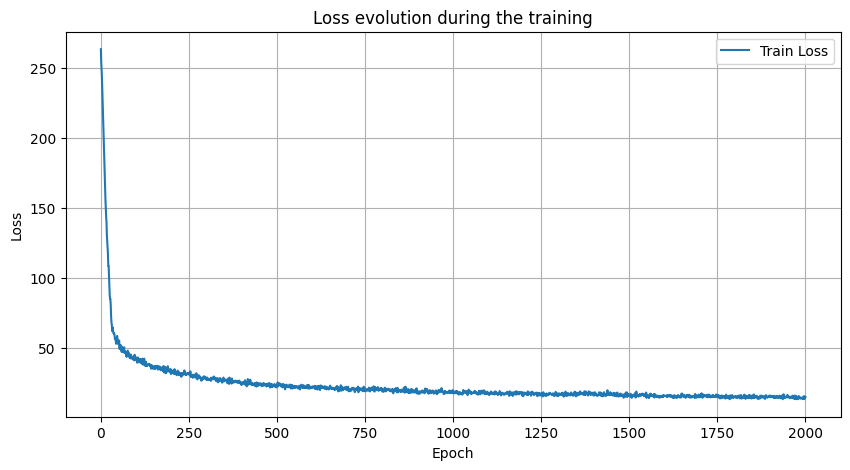

100%|██████████| 2001/2001 [02:24<00:00, 13.89it/s]


Epoch 2000, Reconstruction Error: 15.509339332580566, RS Distance: -0.0012097358703613281


In [ ]:
model = VAE_Huber_energy(latent_dim = parameters['latent_dim'],
                         encoder = parameters['encoder'],
                         decoder = parameters['decoder'],
                         learning_rate = training_parameters['learning_rate'])

model.train(data = training_parameters['dataset'],
            epochs = training_parameters['epochs'],
            batch_size = training_parameters['batch_size'])

# Results

## Initial data with the VAE-reconstructed data

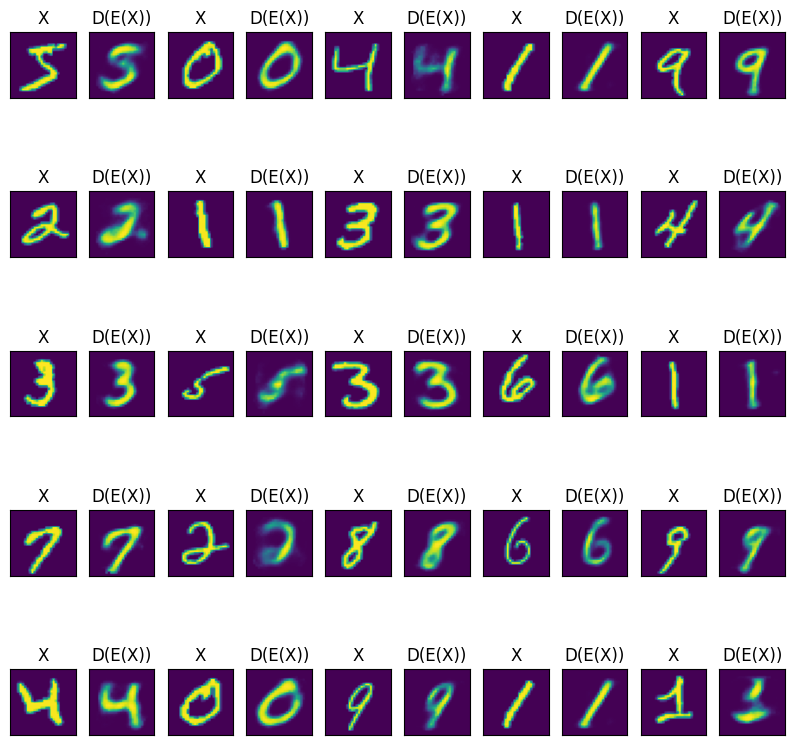

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,10,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if parameters['1D data']:
      plt.plot(training_parameters['dataset'][i])
    else:
      plt.imshow(training_parameters['dataset'][i])
    plt.title("X")

    plt.subplot(5,10,2*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    _ = model.encoder(tf.expand_dims(training_parameters['dataset'][i], axis = 0))
    decoded_images = model.decoder(_)
    if parameters['1D data']:
      plt.plot(decoded_images[0])
    else:
      plt.imshow(decoded_images[0])
    plt.title("D(E(X))")
plt.show()

## Generation of data

We now generate new data that should follow the same distribution as the initial data. \\
By comparing the reconstruction error and the ability to generate new data, we can see how the two terms of the loss got minimized. If the reconstruction is good but the generation is bad, then the latent term should not have got minimized well (we could then higher the lambda factor).

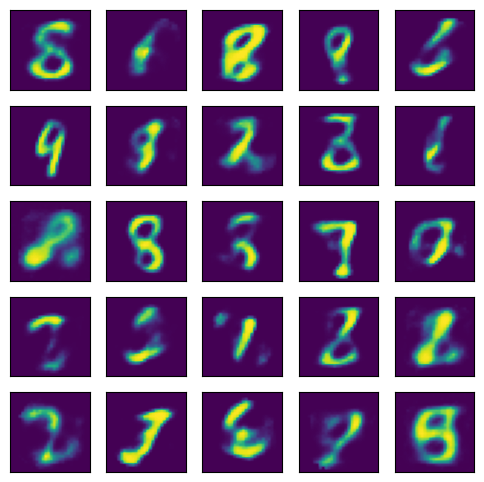

In [ ]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = model.decoder(tf.random.normal([1, parameters['latent_dim']]))
    if parameters['1D data']:
      plt.plot(img[0])
    else:
      plt.imshow(img[0])
plt.show()

## Transforming an image to another one

By interpolating in the latent space two encoded images, we can make a smooth transition from the first image to the second one.

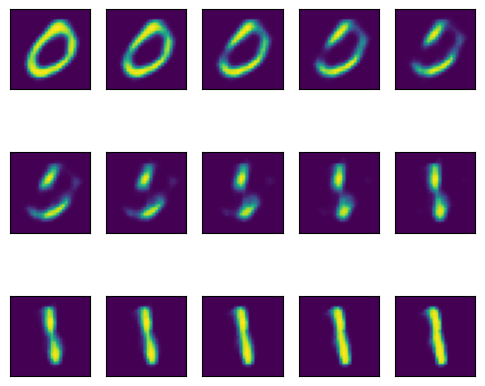

In [ ]:
img0 = training_parameters['dataset'][1]
img0_encoded = model.encoder(tf.expand_dims(img0, axis = 0))

img1 = training_parameters['dataset'][6]
img1_encoded = model.encoder(tf.expand_dims(img1, axis = 0))

imgs = [model.decoder([(1-t)*img0_encoded + t*img1_encoded]) for t in np.linspace(0, 1, 15)]

plt.figure(figsize=(6,9))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = imgs[i]
    if parameters['1D data']:
      plt.plot(img[0])
    else:
      plt.imshow(img[0])
plt.show()